# Exercise 03.1

## What an option is
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
In this exercise we calculate the optimal price of a <font style="color:red"> plain vanilla option </font>, also known as european option. A european option is a contract that gives the buyer (holder) the right, but not the obligation, to buy (call options) or sell (put options) a given asset at an agreed upon price (which will be referred to as $K$) and expiry date (More complex options, such as american ones, give the right to buy or sell at *any time* before expiring date).

## Definition of optimal price
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
It might be clear that an option is an asymmetric contract, in which the holder gains a right and the writer assumes an obligation. This sets an important problem: what is the right price the writer should ask in exchange for this disadvantage?  
The answer is that the writer should ask exactly the same amount the holder is expected to profit from the option.  
Let's call $S(t)$ the price of the asset on the market at a generic time $t$, where $t=0$ is the time the option is sold and $t=T$ is the expiry date.  
At time $T$, the holder profits from the option if it is convenient for them to buy (or sell) the asset from the writer. In other words, the profit is:
$$ Profit=max  [0, S(T)-K ] $$ for a call option and $$ Profit=max [0, K-S(T)] $$ for a put option.  
Then the optimal price of the option is the expected value of such profit: $$ Price= E[e^{-rT}Profit]$$ where the exponential factor comes from the fact that, given a risk-free interest rate $r$, a certain amount of money at time $t=0$ will become $e^{rT}$ larger at time $T$.

## Black-Scholes analytic solution
Under some hypoteses, the problem of option pricing can be solved analytically. In particular, Black-Scholes solution applies when $S(t)$ follows a geometric brownian motion with drift $\mu$ and volatility $\sigma$ ($GMB(\mu,\sigma^2)$):
$$ S(t) = S(0) \exp\left(\left(\mu-\frac{1}{2}\sigma^2 \right) t+\sigma W(t) \right)$$
and the option is european. In this case, the analytic solution is:  
- European Call-option price:
$$ C\left[ S(0),0 \right] = S(0) N(d_1) -K e^{-rT} N(d_2) $$
- European Put-option price:
$$ P\left[ S(0),0 \right] = S(0) \left[ N(d_1)-1\right] -K e^{-rT} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T}}\left[ \ln \left( \frac{S(0)}{K} \right) + \left( r+\frac{\sigma^2}{2} T \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

## Numerical solution
We now compute numerically the values $ C\left[ S(0),0 \right] $ and $ P\left[ S(0),0 \right] $ by sampling a geometric brownian motion with $\mu=r$ and volatility $\sigma$. To do so, we discretize the brownian motion:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    with $Z_i \sim \mathcal{N}(0,1)$  
Such a discretization reproduces exactly the distribution of the continuous brownian motion, independently of the magnitude of the interval $t_{i+1}-t_i$. The value $S(t_{i+1})$ can then be computed in two different ways:
1. Imposing $t_{i+1}=T$ and $t_i=0$, $S(T)$ can be obtained with a single step (plots on the left).
2. Partitioning the interval $[0, T]$ in $n$ sub-intervals and performing the geometric random walk (plots on the right).

The simulations are run both for call options pricing and put options pricing.
For each case, we generate $M$ values of $e^{-rT}max[0, S(T)-K]$ (for call options, $K-S(T)$ for put options) divided in $N$ blocks. For each block, the average is taken. The results shown in the plots are the difference between the cumulative averages of such $N$ realizations and the result computed with the analytical formula. 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
from scipy.special import erf
from numpy import exp
from numpy.lib.scimath import log, sqrt

The following cell displays the economical parameters used in the simulation. $M$ and $N$ are displayed on the plots directly. 

In [2]:
# Load economically relevant parameters from file
S0, T, K, r, sigma = np.loadtxt("es03.1/economic_parameters.dat", delimiter=' ', usecols=(0, 1, 2, 3, 4))

# Print economically relevant parameters
print("S_0=", int(S0))  # Initial stock price
print("T=", T)           # Time to maturity (in years)
print("K=", K)           # Strike price
print("r=", r)           # Risk-free interest rate
print("Volatility=", sigma)  # Volatility (standard deviation of returns)

# Define files containing simulation parameters
paramfiles = ["es03.1/sim_onestep_parameters.dat", "es03.1/sim_walk_parameters.dat"]

S_0= 100
T= 1.0
K= 100.0
r= 0.1
Volatility= 0.25


 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


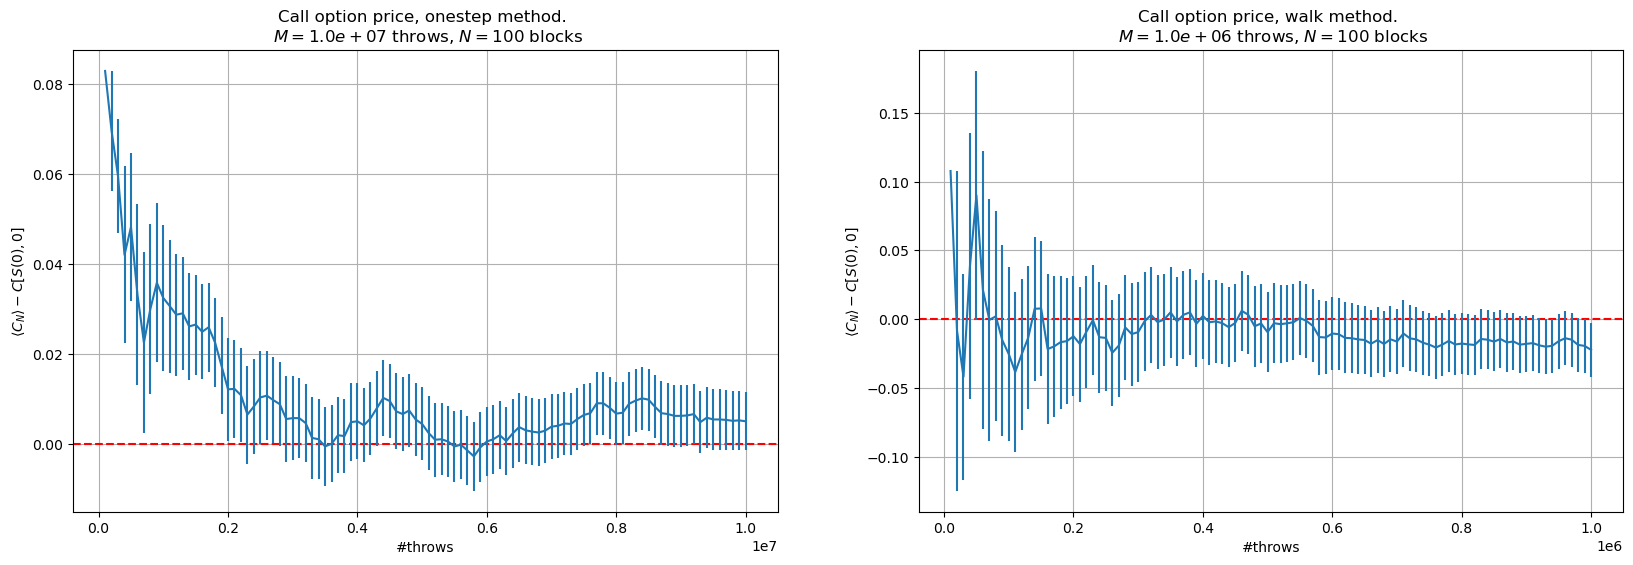

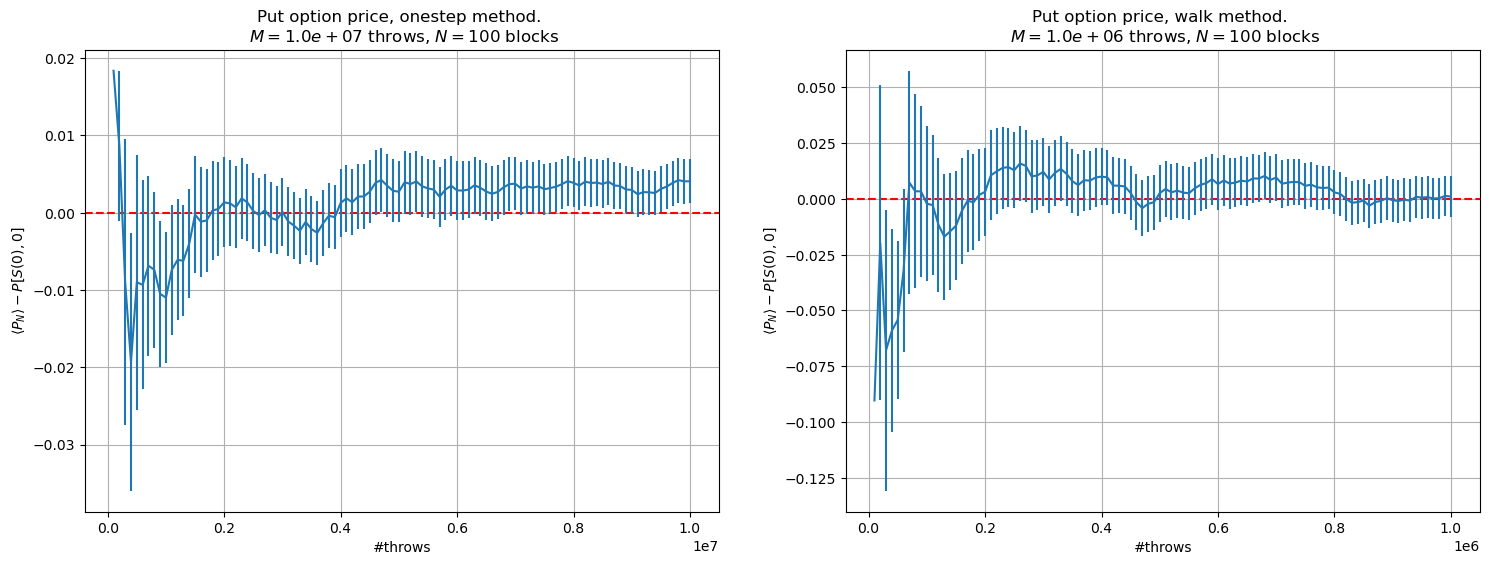

In [3]:
# Analytic solution for Black-Scholes model
# Define the cumulative distribution function
def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

# Define the Black-Scholes pricing function for call and put options
def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    call = S0 * N(d1) - K * exp(-r * T) * N(d2)
    put = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return call, put


# Calculate the Black-Scholes call and put option prices
call, put = black_scholes(S0, K, T, r, sigma)
    
# Print the results
print(" == BLACK-SCHOLES ==")
print("call: ", call)
print("put: ", put)

# Numerical simulation
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the file paths containing simulation parameters
paramfiles = ["es03.1/sim_onestep_parameters.dat", "es03.1/sim_walk_parameters.dat"]

# Define the data files for call and put option prices
datafiles_call = ["es03.1/call_onestep.out", "es03.1/call_walk.out"]
datafiles_put = ["es03.1/put_onestep.out", "es03.1/put_walk.out"]

# Create subplots for call option prices
fig, axx = plt.subplots(1, 2, figsize=(20, 6))
axx.reshape(-1)
for i in range(2):
    ax = axx[i]
    # Load parameters from file
    M, N = np.loadtxt(paramfiles[i], delimiter=' ', usecols=(0,1))
    L = int(M/N)
    x = np.arange(N)
    x = x + 1
    x *= L  # Number of throws = block * (Number of throws in each block)
    
    # Load data from file
    data, err = np.loadtxt(datafiles_call[i], usecols=(0,1), delimiter=' ', unpack='true')

    # Set axes parameters
    ax.set_xlabel('#throws')
    ax.set_ylabel(r'$\langle C_N \rangle - C[S(0),0]$')
    scientific_M = "{:.1e}".format(int(M))
    ax.set_title(f'Call option price, {["onestep", "walk"][i]} method. \n $ M={scientific_M}$ throws, $N={int(N)}$ blocks')
    ax.grid(True)
    ax.axhline(y=0, color='red', linestyle='--')
    
    # Plot data
    ax.errorbar(x, data - call, yerr=err)

# Create subplots for put option prices
fig, axx = plt.subplots(1, 2, figsize=(18, 6))
axx.reshape(-1)
for i in range(2):
    ax = axx[i]
    # Load parameters from file
    M, N = np.loadtxt(paramfiles[i], delimiter=' ', usecols=(0,1))
    L = int(M/N)
    x = np.arange(N)
    x = x + 1
    x *= L  # Number of throws = block * (Number of throws in each block)
    
    # Load data from file
    data, err = np.loadtxt(datafiles_put[i], usecols=(0,1), delimiter=' ', unpack='true')

    # Set axes parameters
    ax.set_xlabel('#throws')
    ax.set_ylabel(r'$\langle P_N \rangle - P[S(0),0]$')
    scientific_M = "{:.1e}".format(int(M))
    ax.set_title(f'Put option price, {["onestep", "walk"][i]} method. \n $M={scientific_M}$ throws, $N={int(N)}$ blocks')
    ax.grid(True)
    ax.axhline(y=0, color='red', linestyle='--')
    
    # Plot data
    ax.errorbar(x, data - put, yerr=err)

All the numerical results show great accordance with the anaylitical values, being within at most $2\sigma$ from them.